# Stats and probability (1)

### This notebook contain examples for slides page 3-14.
#### Concetps covered: 
1. Central limit theorem, histogram
2. Standard error of the mean, 95% confidence interval, errobar
3. Data standardization (z-score transformation)
4. Pearson correlation
5. Spearman rank correlation

In [2]:
# load modules needed
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

### Histogram

[0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 10, 10]
[2. 4. 3. 1. 3. 4. 2. 3. 4. 4.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


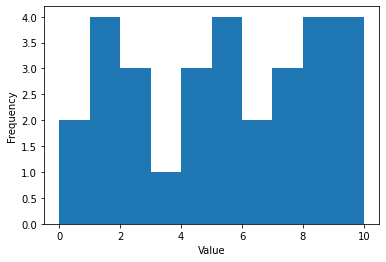

In [4]:
#np.random.seed(0)
a = np.random.randint(0, 11, 30)
print(sorted(a))
[counts, bin_bounds, _] = plt.hist(a, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
print(counts)
print(bin_bounds)

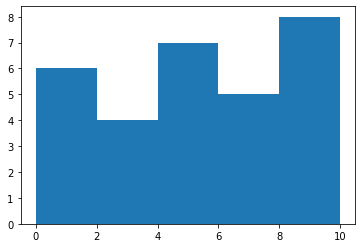

In [7]:
#[counts2, bin_bounds2, _] = plt.hist(a, bins=5)

[counts2, bin_bounds2, _] = plt.hist(a, bins=range(0, 11, 2))


### 1. Central limit theorem, histogram

#### Example using simulated random numbers

In [ ]:
# function used by the next two experiments
def plotHist(data, title='histogram', xlabel='bin center', ylabel='frequency'):
    counts = plt.hist(data, 20) # plot histogram and return counts containing frequency and bin center data 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    m = np.mean(data)
    s = np.std(data)
    str_m = 'mean: %.3f, std: %.3f' %(m, s) # text to be displayed on fig
    plt.annotate(str_m, [counts[1][1], np.max(counts[0])/2], color='red') # location of text aligned with second bin center and half max frequency
    plt.show()

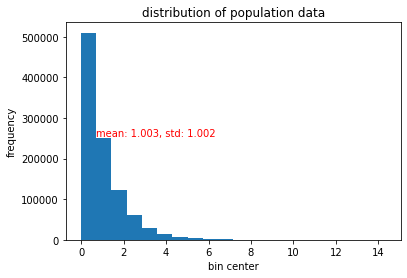

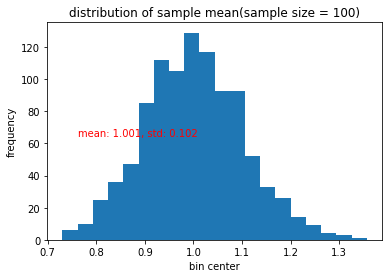

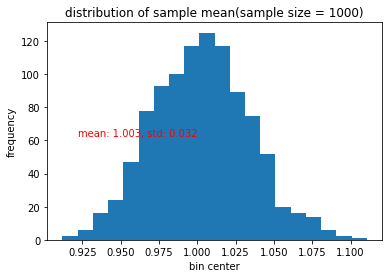

In [ ]:
a = np.random.rand(10**6)

# replace a with any of the following line to see different distributions
# a = np.random.randn(10**6)*5 +  175; 
a = np.random.exponential(size=(10**6))
# a = np.random.lognormal(size=(10**6))


plotHist(a, 'distribution of population data')
# now draw 100 samples, repeat 1000 times.
# save in a 100x1000 matrix

b = np.random.choice(a, (100,1000), replace=True)
# mean of each column
sampleMean = np.mean(b, axis=0) 
plotHist(sampleMean, 'distribution of sample mean(sample size = 100)')

b = np.random.choice(a, (1000,1000), replace=True)
# mean of each column
sampleMean = np.mean(b, axis=0) 
plotHist(sampleMean, 'distribution of sample mean(sample size = 1000)')


### 2. Standard error of the mean, confidence interval, errorbar

In [2]:
measures = np.random.randint(0, 100, size=(10,3))
measures

NameError: name 'np' is not defined

In [1]:
SEM = np.std(measures,0)/math.sqrt(measures.shape[0]) # SEM = std / sqrt(n)
SEM

NameError: name 'np' is not defined

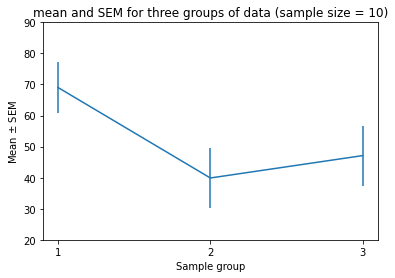

In [ ]:
plt.errorbar([1,2,3], np.mean(measures,0), SEM);  
plt.xticks([1,2,3])
plt.ylim([20, 90])
plt.xlabel('Sample group')
plt.ylabel('Mean $\pm$ SEM')
plt.title('mean and SEM for three groups of data (sample size = %d)' %measures.shape[0])
plt.show()

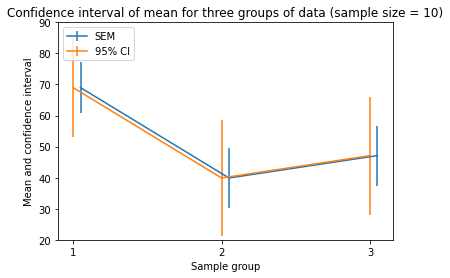

In [ ]:
plt.errorbar([1.05,2.05,3.05], np.mean(measures,0), SEM) 
plt.errorbar([1,2,3], np.mean(measures,0), SEM*1.96); 
plt.xticks([1, 2, 3])
plt.ylim([20, 90])
plt.xlabel('Sample group')
plt.ylabel('Mean and confidence interval')
plt.title('Confidence interval of mean for three groups of data (sample size = %d)' %measures.shape[0])
plt.legend(('SEM', '95% CI'), loc=2)
plt.show()

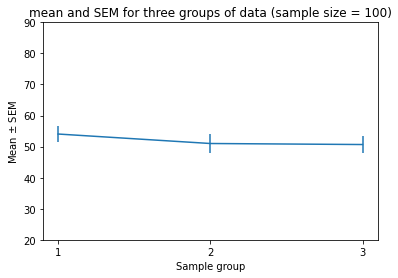

In [ ]:
measures = np.random.randint(0, 100, size=(100,3))
SEM = np.std(measures,0)/math.sqrt(measures.shape[0]) # SEM = std / sqrt(n)
plt.errorbar([1,2,3], np.mean(measures,0), SEM);  
plt.xticks([1,2,3])
plt.ylim([20, 90])
plt.xlabel('Sample group')
plt.ylabel('Mean $\pm$ SEM')
plt.title('mean and SEM for three groups of data (sample size = %d)' %measures.shape[0])
plt.show()

### 3. Z-score transformation

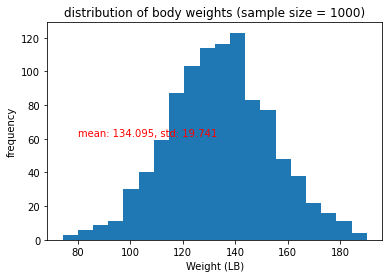

In [ ]:
np.random.seed(0) # fix seed for reproducibility
w = np.random.randn(1000) * 20 + 135  # simulate body weights of 1000 samples
title_str = 'distribution of body weights (sample size = %d)' %w.shape[0]
plotHist(w, title_str, xlabel='Weight (LB)')
plt.show()

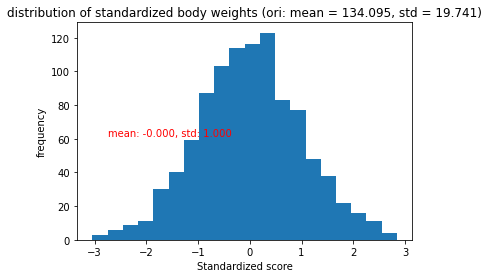

In [ ]:
m = np.mean(w)
s = np.std(w)
zscore = (w - m) / s

title_str = 'distribution of standardized body weights (ori: mean = %.3f, std = %.3f)' %(m, s)
plotHist(zscore, title_str, xlabel='Standardized score')


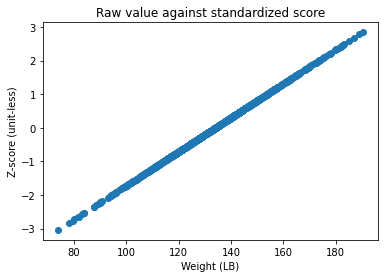

In [ ]:
# original against standardized plot
plt.scatter(w, zscore)
plt.xlabel('Weight (LB)')
plt.ylabel('Z-score (unit-less)')
plt.title('Raw value against standardized score')
plt.show()

### 4. Pearson Correlation

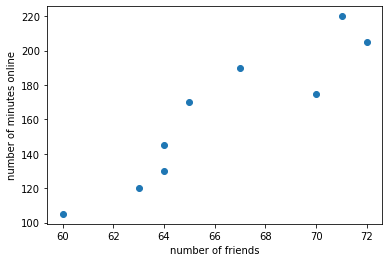

In [ ]:
friends = np.array([ 70, 65, 72, 63, 71, 64, 60, 64, 67])
minutes = np.array([175, 170, 205, 120, 220, 130, 105, 145, 190])
plt.scatter(friends, minutes)
plt.xlabel('number of friends')
plt.ylabel('number of minutes online')
plt.show()

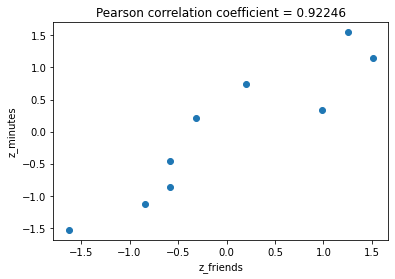

In [ ]:
def zscore(numArray):
   return (numArray - np.mean(numArray))/np.std(numArray)

zfriends = zscore(friends)
zminutes = zscore(minutes)
plt.scatter(zfriends, zminutes)
plt.xlabel('z_friends')
plt.ylabel('z_minutes')
pcc = zfriends.dot(zminutes) / len(friends) # compute pearson correlation coefficient; formula in slides
plt.title('Pearson correlation coefficient = %.5f' %pcc)
plt.show()

In [ ]:
pcc_from_np = np.corrcoef(friends, minutes)
print('pcc matrix from np corrcoef: \n', pcc_from_np)

pcc matrix from np corrcoef: 
 [[1.         0.92246383]
 [0.92246383 1.        ]]


In [ ]:
import scipy.stats as stats
pcc_from_scipy = stats.pearsonr(friends, minutes)
print('pcc and p-value from scipy.stats: \n', pcc_from_scipy) # smaller p-vall means more significant correlation

pcc and p-value from scipy.stats: 
 (0.9224638302166002, 0.00039591440105629416)


#### Pearson correlation is sensitive to outliers

Text(0.5, 1.0, 'Pearson correlation coefficient = -0.95015')

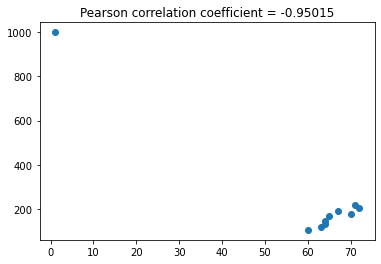

In [ ]:
friends2=np.append(friends,1)
minutes2=np.append(minutes,1000)
plt.scatter(friends2, minutes2)
plt.xlabel('')
pcc = np.corrcoef(friends2, minutes2)[0,1]
plt.title('Pearson correlation coefficient = %.5f' %pcc)

#### Does scaling change correlation?

In [ ]:
np.corrcoef(friends, 3*minutes)[0, 1] # linear transformation does not change pearson correlation

0.9224638302166003

In [ ]:
np.corrcoef(friends, 3*minutes + 20)[0, 1] 

0.9224638302166003

In [ ]:
np.corrcoef(friends, minutes**2)[0, 1]

0.9160362743758763

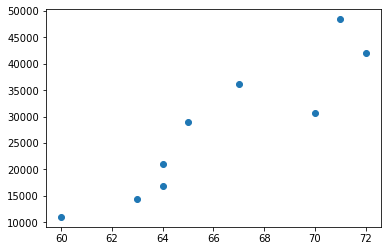

In [ ]:
plt.scatter(friends, minutes**2)    # non-linear transoformation may change pearson correlation

### 5. Spearman rank correlation is robust against outliers and non-linear transformation 

In [ ]:
friends_rank = np.argsort(np.argsort(friends))
minutes_rank = np.argsort(np.argsort(minutes))
np.corrcoef(friends_rank, minutes_rank)[0,1]

0.9666666666666667

In [ ]:
friends2_rank = np.argsort(np.argsort(friends2))
minutes2_rank = np.argsort(np.argsort(minutes2))
np.corrcoef(friends2_rank, minutes2_rank)[0,1]

0.43030303030303024

In [ ]:
# spearman rank correlation and p-value from scipy.stats
src=scipy.stats.spearmanr(friends2_rank, minutes2_rank)
src

SpearmanrResult(correlation=0.43030303030303024, pvalue=0.21449233253280775)

In [ ]:
src.correlation

0.43030303030303024

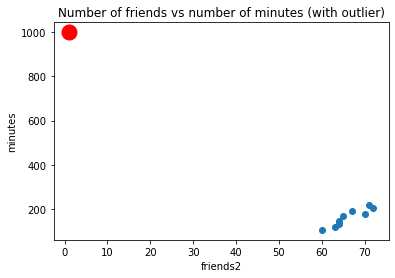

In [ ]:
plt.scatter(friends2, minutes2)
plt.xlabel('friends2')
plt.ylabel('minutes')
plt.title('Number of friends vs number of minutes (with outlier)')
plt.plot(friends2[-1], minutes2[-1], 'o', markersize=15, color='red')
plt.show()

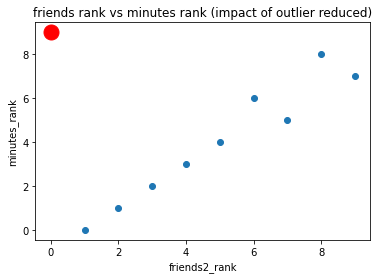

In [ ]:
plt.scatter(friends2_rank, minutes2_rank)
plt.xlabel('friends2_rank')
plt.ylabel('minutes_rank')
plt.title('friends rank vs minutes rank (impact of outlier reduced)')
plt.plot(friends2_rank[-1], minutes2_rank[-1], 'o', markersize=15, color='red')
plt.show()

In [ ]:
scipy.stats.spearmanr(friends, minutes)

SpearmanrResult(correlation=0.9623515200690815, pvalue=3.285856459769463e-05)

In [ ]:
scipy.stats.spearmanr(friends, minutes*3+10)

SpearmanrResult(correlation=0.9623515200690815, pvalue=3.285856459769463e-05)

In [ ]:
scipy.stats.spearmanr(friends, minutes**2)

SpearmanrResult(correlation=0.9623515200690815, pvalue=3.285856459769463e-05)

In [ ]:
scipy.stats.spearmanr(friends, np.log2(minutes))

SpearmanrResult(correlation=0.9623515200690815, pvalue=3.285856459769463e-05)